# Python - Cleaning Up Data - Pandas DataFrame

## 1. CSV -> Pandas

In [3]:
import pandas as pd
# Read the file into a DataFrame: df
df = pd.read_csv("/Users/XavierTang/Documents/Data Science/Python/data/dob_job_application_filings_subset.csv")

# Print the head of df
print(df.head())

# Print the tail of df
print(df.tail())

# Print the shape of df
print(df.shape) #it is an attribute, not method, so no need ()

# Print the columns of df
print(df.columns) #it is an attribute, not method, so no need ()

#print the info of df
print(df.info())

       Job #  Doc #        Borough       House #  \
0  121577873      2      MANHATTAN  386            
1  520129502      1  STATEN ISLAND  107            
2  121601560      1      MANHATTAN  63             
3  121601203      1      MANHATTAN  48             
4  121601338      1      MANHATTAN  45             

                        Street Name  Block  Lot    Bin # Job Type Job Status  \
0  PARK AVENUE SOUTH                   857   38  1016890       A2          D   
1  KNOX PLACE                          342    1  5161350       A3          A   
2  WEST 131 STREET                    1729    9  1053831       A2          Q   
3  WEST 25TH STREET                    826   69  1015610       A2          D   
4  WEST 29 STREET                      831    7  1015754       A3          D   

   ...               Owner's Last Name             Owner's Business Name  \
0  ...  MIGLIORE                        MACKLOWE MANAGEMENT                
1  ...  BLUMENBERG                      NA            

### 1.1 Frequency counts   

value_counts will print out the counts for each unique value in a column in descending order.   
It is useful to check missing data, and also expected frequency of data and data type.

In [16]:
df.Borough.value_counts(dropna=False)#col select using dot(.), dropna: shows how many NA values
# df["Borough"].value_counts(dropna=False)  #same as above

MANHATTAN        6310
BROOKLYN         2866
QUEENS           2121
BRONX             974
STATEN ISLAND     575
Name: Borough, dtype: int64

In [19]:
df.State.value_counts(dropna=False).head() #prints only the top 5 of the frequency counts

NY    12391
NJ      241
PA       38
CA       20
OH       19
Name: State, dtype: int64

### 1.2 Quick stats for all columns - *describe()*

Only columns with numerical type will be returned.

In [20]:
df.describe()

,Job #,Doc #,Block,Lot,Bin #,Cluster,PC Filed,Existing Zoning Sqft,Proposed Zoning Sqft,Enlargement SQ Footage,Street Frontage,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height,Owner Type,Zip,Owner'sPhone #
count,1.284600e+04,12846.000000,12846.000000,12846.000000,1.284600e+04,0.0,0.0,1.284600e+04,1.284600e+04,12846.000000,12846.000000,12846.000000,12846.000000,12846.000000,12846.000000,0.0,1.284600e+04,1.284600e+04
mean,2.426788e+08,1.162930,2703.834735,623.303441,2.314997e+06,NaN,NaN,1.439973e+03,2.007286e+03,46.101432,3.069360,8.062354,8.144325,94.022809,94.917562,NaN,1.210268e+06,5.025739e+09
std,1.312507e+08,0.514937,3143.002812,2000.934794,1.399062e+06,NaN,NaN,3.860757e+04,4.081570e+04,784.216569,37.246034,11.874080,11.843492,146.917360,146.580666,NaN,1.343588e+07,2.738212e+09
min,1.036438e+08,1.000000,1.000000,0.000000,1.000003e+06,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,8.300000e+02,0.000000e+00
25%,1.216206e+08,1.000000,836.000000,12.000000,1.035728e+06,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,2.000000,20.000000,21.000000,NaN,1.001900e+04,2.126841e+09
50%,2.202645e+08,1.000000,1411.500000,32.000000,2.004234e+06,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,4.000000,4.000000,45.000000,45.000000,NaN,1.031000e+04,5.169379e+09
75%,3.208652e+08,1.000000,3355.000000,59.000000,3.343823e+06,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,9.000000,9.000000,105.000000,107.000000,NaN,1.122100e+04,7.186809e+09
max,5.400246e+08,9.000000,99999.000000,9078.000000,5.864852e+06,NaN,NaN,2.873107e+06,2.873107e+06,50384.000000,3160.000000,102.000000,102.000000,4200.000000,4200.000000,NaN,6.063135e+08,9.787266e+09


### 1.3 Plot from Pandas the frequency count of a certain column

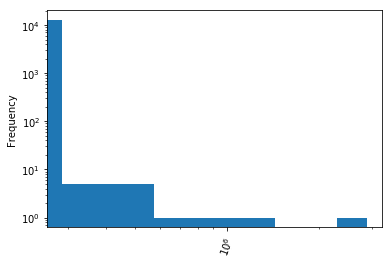

In [35]:
import matplotlib.pyplot as plt
df['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=True, logy=True) #log scale
plt.show()

### 1.4 Conditional slicing within Pandas

In [31]:
df[df.Block>15000] #can be used to find outliers.

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,Owner's Last Name,Owner's Business Name,Owner's House Number,Owner'sHouse Street Name,City,State,Zip,Owner'sPhone #,Job Description,DOBRunDate
834,420829526,1,QUEENS,43,MARKET STREET,16350,300,4465434,A2,D,...,LIGHTHALL,"BREEZY POINT COOPERATIVE, INC",202-30,ROCKAWAY POINT BOULEVARD,ROCKAWAY POINT,NY,11697,7189452300,FILING TO TEMPORARILY SHORE EXTG HOUSE.REMOVE ...,04/30/2013 12:00:00 AM
913,420830998,1,QUEENS,175,OCEAN AVENUE,16350,400,4465625,NB,D,...,LIGHTHALL,"BREEZY POINT COOPERATIVE, INC.",202-30,ROCKAWAY POINT BOULEVARD,ROCKAWAY POINT,NY,11697,7189452300,ERECT TWO STORY - ONE FAMILY DWELLING AS PER P...,04/30/2013 12:00:00 AM
921,420829580,1,QUEENS,75,REID AVENUE,16350,300,4464956,DM,E,...,LIGHTHALL,"BREEZY POINT COOPERATIVE, INC.",202-30,ROCKAWAY POINT BOULEVARD,ROCKAWAY POINT,NY,11697,7189452300,LEGALIZATION OF DEMOLITION AFFECTED BY HURRICA...,04/30/2013 12:00:00 AM
987,420829438,1,QUEENS,531,BEACH 127 STREET,16195,21,4303992,A3,D,...,MURRAY,N/A,531,BEACH 127TH STREET,BELLE HARBOR,NY,11694,9172879254,BUILDERS PAVEMENT PLAN - TOTAL FRONTAGE = 26.6...,04/30/2013 12:00:00 AM
1108,420818690,2,QUEENS,6820,ROCKAWAY BEACH BLVD.,15918,1,4541673,A2,P,...,VENTEGEAT,"BENJAMIN BEECHWOOD RETAIL, LLC",377,OAK STREET,GARDEN CITY,NY,11530,5167450150,"MECHANICAL WORK TYPE FILED FOR HVAC DUCTWORK, ...",04/30/2013 12:00:00 AM
1221,420840120,1,QUEENS,432,BEACH 130TH STREET,16211,62,4304432,A3,D,...,NAPOLI,JOSEPH G. NAPOLI- OWNER,432,BEACH 13OTH STREET,BELLE HARBOR,NY,11694,9177099533,THIS APPLICATION HAS BEEN PROFESSIONALLY CERTI...,05/01/2013 12:00:00 AM
1272,420829740,1,QUEENS,114,BEACH 219 STREET,16350,400,4467242,NB,D,...,LIGHTHALL,C,202-30,ROCKAWAY POINT BLVD,ROCKAWAY POINT,NY,11697,7189452300,"PROPOSED TWO STORY, SINGLE FAMILY RESIDENCE. N...",05/01/2013 12:00:00 AM
1420,420829731,1,QUEENS,7,FULTON WALK,16350,400,4465597,NB,D,...,LIGHTHALL,C,202-30,ROCKAWAY POINT BLVD,ROCKAWAY POINT,NY,11697,7189452300,"PROPOSED ONE STORY, SINGLE FAMILY RESIDENCE. N...",05/01/2013 12:00:00 AM
1428,420829759,1,QUEENS,10,IRVING WALK,16350,400,4465816,NB,D,...,LIGHTHALL,C,202-30,ROCKAWAY POINT BLVD,ROCKAWAY POINT,NY,11697,7189452300,"PROPOSED TWO STORY, SINGLE FAMILY RESIDENCE. N...",05/01/2013 12:00:00 AM
1613,420578887,1,QUEENS,315,BEACH 104 STREET,16160,10,4819842,NB,D,...,HAQUE,NYCDEP,95-05,HORACE HARDING EXPWY,CORONA,NY,11368,7185955132,INSTALLATION OF TWO NEW PRE-ENGINEERED STEEL S...,05/02/2013 12:00:00 AM


### 1.5 Boxplot - Visualise basic stats summary: min/max, 25/50/75 percentile and outliers.

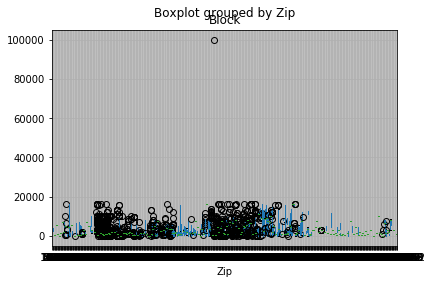

In [38]:
df.boxplot(column="Block", by="Zip") #most data should be in the box, whiskers extending out shows outliers.
plt.show()

### 1.6 Scatter plots - relationship between 2 numerical variables: can be used to flag error that cannot be seen with 1 variable

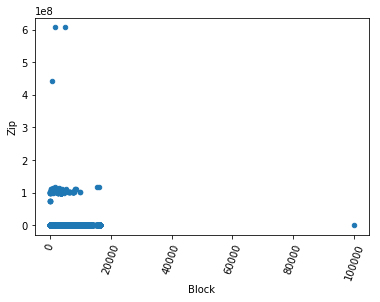

In [40]:
df.plot(kind="scatter", x="Block", y="Zip", rot=70) #axis label rotation by 70 degree
plt.show()

## 2. Principle of Tidy Data

**Columns represent separate variables**   
**Rows represent individual observations**   
**Each type of observational units forms a table**

Take note that it is dfferent for data that presented for analysis or reporting.   

## 2.1 Fixing column containing values, instead of variables - *pd.melt()*   

melting : turn columns into rows, opposite of pivoting.   
Note in this example, the data after melting is not tidy data.

In [48]:
AQ = pd.read_csv("/Users/XavierTang/Documents/Data Science/Python/data/airquality.csv")
print(AQ.head())
# Melt airquality: airquality_melt
AQ_melt = pd.melt(frame=AQ, id_vars=["Month", "Day"],var_name="measurement", value_name="reading") #id_vars: the column that you DO NOT want to melt, i.e.keep its shape

# Print the head of airquality_melt
print(AQ_melt.head())

   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5
   Month  Day measurement  reading
0      5    1       Ozone     41.0
1      5    2       Ozone     36.0
2      5    3       Ozone     12.0
3      5    4       Ozone     18.0
4      5    5       Ozone      NaN


## 2.2 Fixing rows containing Pivoting

Pivoting: turn each unique value of a variable and turn them into a separate columns.   
It is commonly used to reshape analysis-friendly data to report-friendly data.   
Or the data violates tidy data principle: row DOES NOT contain observation (specifically multiple variable are stored in the same column).

In [52]:
#pivot method, cannot deal with duplicated entries (after pivoting, multiple entries might go into the same cell)
#AQ_pivot = AQ.pivot(index="", columns="", values="") #index: which columns we want to fix in pivot, columns: the one we want to pivot into new ones, value: values used to fill in the new column, created during pivot

#pivot table: has a parameter that specifies how to deal with duplicate values. e.g. take average of the duplcate value.
#AQ_pivot = AQ.pivot(values="", index="", columns="", aggfunc=np.mean)

print(AQ_melt.head())
AQ_pivot = AQ_melt.pivot_table(index=["Month", "Day"], columns="measurement", values="reading")
print(AQ_pivot.head())

   Month  Day measurement  reading
0      5    1       Ozone     41.0
1      5    2       Ozone     36.0
2      5    3       Ozone     12.0
3      5    4       Ozone     18.0
4      5    5       Ozone      NaN
measurement  Ozone  Solar.R  Temp  Wind
Month Day                              
5     1       41.0    190.0  67.0   7.4
      2       36.0    118.0  72.0   8.0
      3       12.0    149.0  74.0  12.6
      4       18.0    313.0  62.0  11.5
      5        NaN      NaN  56.0  14.3


In [57]:
#the DataFrame obtained has multiindex, need to reset to get back original data frame.
print(AQ_pivot.index)

# Reset the index of airquality_pivot: airquality_pivot_reset
AQ_pivot_reset = AQ_pivot.reset_index()

# Print the new index of airquality_pivot_reset
print(AQ_pivot_reset.index)

# Print the head of airquality_pivot_reset
print(AQ_pivot_reset.head())

MultiIndex(levels=[[5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

### Case in point: TB -> separate and parsing data

separate one column into two column using string slicing.

In [58]:
tb=pd.read_csv("/Users/XavierTang/Documents/Data Science/Python/data/tb.csv")

# Melt tb: tb_melt
tb_melt = pd.melt(frame=tb, id_vars=["country", "year"])

# Create the 'gender' column
tb_melt['gender'] = tb_melt.variable.str[0]

# Create the 'age_group' column
tb_melt['age_group'] = tb_melt.variable.str[1:]

# Print the head of tb_melt
print(tb_melt.head())


  country  year variable  value gender age_group
0      AD  2000     m014    0.0      m       014
1      AE  2000     m014    2.0      m       014
2      AF  2000     m014   52.0      m       014
3      AG  2000     m014    0.0      m       014
4      AL  2000     m014    2.0      m       014


### Case in point: separate columns by using delimiters

In [57]:
ebola=pd.read_csv("/Users/XavierTang/Documents/Data Science/Python/data/ebola.csv")

# Melt ebola: ebola_melt
ebola_melt = pd.melt(ebola, id_vars=["Date", "Day"], var_name="type_country", value_name="counts")

# Create the 'str_split' column
ebola_melt['str_split'] = ebola_melt.type_country.str.split('_')

# Create the 'type' column
ebola_melt['type'] = ebola_melt.str_split.str.get(0)

# Create the 'country' column
ebola_melt['country'] = ebola_melt.str_split.str.get(1)

# Print the head of ebola_melt
print(ebola_melt.head())

         Date  Day  type_country  counts        str_split   type country
0    1/5/2015  289  Cases_Guinea  2776.0  [Cases, Guinea]  Cases  Guinea
1    1/4/2015  288  Cases_Guinea  2775.0  [Cases, Guinea]  Cases  Guinea
2    1/3/2015  287  Cases_Guinea  2769.0  [Cases, Guinea]  Cases  Guinea
3    1/2/2015  286  Cases_Guinea     NaN  [Cases, Guinea]  Cases  Guinea
4  12/31/2014  284  Cases_Guinea  2730.0  [Cases, Guinea]  Cases  Guinea


## 3. Combining data

### 3.1 Concatenating Data Frame (row data combine)

In [16]:
dict1 = {
    "country":["Brazil","Russia","India","China","South Africa"],
    "capital":["Brasilia","Moscow","New Delhi","Beijing","Pretoria"],
    "area":[8.516,17.10,3.296,9.597,1.221],
    "population":[200.4,143.5,1252,1357,52.98]
}

dict2 = {
    "country":["Singapore","Malaysia","Thailand"],
    "capital":["Singapore","Kuala Lumpur","Bangkok"],
    "area":[0.0000001,0.000003,0.000004],
    "population":[5.1,10.3,12.4]
}

#keys (col labels)   values (data, col by col)
bricks1 = pd.DataFrame(dict1)
bricks2 = pd.DataFrame(dict2)

print(bricks1)
print(bricks2)

#default axis=0 for pd.concat: row combining.
bricks_all1 = pd.concat([bricks1,bricks2]) #notice the label retained from the two DF, might not be ideal. Also notice that the DF are in a list.
print(bricks_all1)

bricks_all2 = pd.concat([bricks1,bricks2], ignore_index=True) #notice the labels are now in sequence.
print(bricks_all2)

        country    capital    area  population
0        Brazil   Brasilia   8.516      200.40
1        Russia     Moscow  17.100      143.50
2         India  New Delhi   3.296     1252.00
3         China    Beijing   9.597     1357.00
4  South Africa   Pretoria   1.221       52.98
     country       capital          area  population
0  Singapore     Singapore  1.000000e-07         5.1
1   Malaysia  Kuala Lumpur  3.000000e-06        10.3
2   Thailand       Bangkok  4.000000e-06        12.4
        country       capital          area  population
0        Brazil      Brasilia  8.516000e+00      200.40
1        Russia        Moscow  1.710000e+01      143.50
2         India     New Delhi  3.296000e+00     1252.00
3         China       Beijing  9.597000e+00     1357.00
4  South Africa      Pretoria  1.221000e+00       52.98
0     Singapore     Singapore  1.000000e-07        5.10
1      Malaysia  Kuala Lumpur  3.000000e-06       10.30
2      Thailand       Bangkok  4.000000e-06       12.40
  

### 3.2 Concatenating Date Frame (column data combine)

In [17]:
dict1 = {
    "country":["Brazil","Russia","India","China","South Africa"],
    "capital":["Brasilia","Moscow","New Delhi","Beijing","Pretoria"],
    "area":[8.516,17.10,3.296,9.597,1.221],
    "population":[200.4,143.5,1252,1357,52.98]
}

dict2 = {
    "country":["Singapore","Malaysia","Thailand"],
    "capital":["Singapore","Kuala Lumpur","Bangkok"],
    "area":[0.0000001,0.000003,0.000004],
    "population":[5.1,10.3,12.4]
}

#keys (col labels)   values (data, col by col)
bricks1 = pd.DataFrame(dict1)
bricks2 = pd.DataFrame(dict2)

print(bricks1)
print(bricks2)

#axis=1: column combining
bricks_all3 = pd.concat([bricks1,bricks2],axis=1)
print(bricks_all3)

        country    capital    area  population
0        Brazil   Brasilia   8.516      200.40
1        Russia     Moscow  17.100      143.50
2         India  New Delhi   3.296     1252.00
3         China    Beijing   9.597     1357.00
4  South Africa   Pretoria   1.221       52.98
     country       capital          area  population
0  Singapore     Singapore  1.000000e-07         5.1
1   Malaysia  Kuala Lumpur  3.000000e-06        10.3
2   Thailand       Bangkok  4.000000e-06        12.4
        country    capital    area  population    country       capital  \
0        Brazil   Brasilia   8.516      200.40  Singapore     Singapore   
1        Russia     Moscow  17.100      143.50   Malaysia  Kuala Lumpur   
2         India  New Delhi   3.296     1252.00   Thailand       Bangkok   
3         China    Beijing   9.597     1357.00        NaN           NaN   
4  South Africa   Pretoria   1.221       52.98        NaN           NaN   

           area  population  
0  1.000000e-07         5

## 4. Globbing


Filename pattern matching   
Uses wild card: * matches any string. ? matches any 1 char.   
Return a list of filename that matches the pattern.   

To load multiple file into DataFrame:   
1) load files from globbing into pandas   
2) add the data frame in a list   
3) Concatenate multiple files at once   


In [21]:
import glob

csv_files = glob.glob("*.csv") #find all csv in the working directory, return a list.
print(csv_files)

['winequality_white.csv']


In [20]:
#initialise an empty list, we will append data frame into it.
list_data = []

#for loop to append all the dataframe (after read_csv) into the list.
for filename in csv_files:
    data = pd.read_csv(filename)
    list_data.append(data)
    
data_concat = pd.concat(list_data)

## 5. Merging Data

It is quite similiar to SQL's join.   
Combine disparate datasets based on common columns.   
There are 3 types of merging:   
1) 1-to-1 merging: no duplicate values in each column.    
2) many-to-1 or 1-to-many: there are duplicate value in one of the key, then values from the other key will be repeated to fill in the duplicates.    
3) many-to-many:both DataFrames do not have unique keys for a merge. What happens here is that for each duplicated key, every pairwise combination will be created.       
All of them use the same function.

In [24]:
dict3 = {
    "state":["California","Texas","Florida","New York"],
    "population":["39250027","27862596","20612439","19745289"]
}

dict4 = {
    "Name":["California","Florida","New York","Texas"],
    "ANSI":["CA","FL","NY","TX"]
}

bricks3 = pd.DataFrame(dict3)
bricks4 = pd.DataFrame(dict4)


#left, right = df, left/right_on are the keys
pd.merge(left=bricks3,right=bricks4,on=None,left_on="state",right_on="Name")


,state,population,Name,ANSI
0,California,39250027,California,CA
1,Texas,27862596,Texas,TX
2,Florida,20612439,Florida,FL
3,New York,19745289,New York,NY


## 6. Cleaning Data

### 6.1 Converting datatype in DataFrame

In [26]:
dict5 = {
    "name":["Daniel","John","Jane"],
    "sex":["male","male","female"],
    "treatment a":["-",12,24],
    "treatment b":[42,13,27]
}

df5=pd.DataFrame(dict5)

print(df5.dtypes)
#object dtype are general representation in python typically for string. (because of the dash "-")

name           object
sex            object
treatment a    object
treatment b     int64
dtype: object


In [28]:
#convert int -> str
df5["treatment b"] = df5["treatment b"].astype(str)
print(df5.dtypes)

name           object
sex            object
treatment a    object
treatment b    object
dtype: object


In [30]:
#convert to category (categorical data)
df5["sex"] = df5["sex"].astype("category")
print(df5.dtypes)
#dtype category has smaller memory, and can have categorical variables in other python libraries.

name             object
sex            category
treatment a      object
treatment b      object
dtype: object


In [33]:
# Numerical data loaded as string (e.g. due to dash): FIX
df5["treatment a"]=pd.to_numeric(df5["treatment a"],errors="coerce")
print(df5.dtypes)
#invalid value will be set as NaN missing values.

name             object
sex            category
treatment a     float64
treatment b      object
dtype: object


In [35]:
tips=pd.read_csv("/Users/XavierTang/Documents/Data Science/Python/data/tips.csv")
tips.info()

# Convert the sex column to type 'category'
tips.sex = tips.sex.astype("category")

# Convert the smoker column to type 'category'
tips.smoker = tips.smoker.astype("category")

# Print the info of tips
print(tips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: category(2), float64(2), int64(1), object(2)
memory usage: 10.3+ KB
None


### 6.2 Use regular expression to clean up


Uses the *re* library   
regular expression gives a formal way to specify a pattern.   
\d*: arbitary number of numerical values  
\d+: numerical value matched one or more times (10 instead of 1 and 0)   
.:match any 1 char    
[A-Z]: any capital letter    
w*: any amount of alphanumerical char
\d{2}: match 2 digits   
^...$: match exactly within  
$: match end of the string (actual dollar sign use \$)   
 



In [37]:
import re
pattern = re.compile("\$\d*\.\d{2}") #save the pattern into a variable essentially.
result = pattern.match("$17.89")
bool(result)

True

In [38]:
# Import the regular expression module
import re

# Find the numeric values: matches
matches = re.findall('\d+', 'the recipe calls for 10 strawberries and 1 banana')

# Print the matches
print(matches)

['10', '1']


### Case in point: write a function that will recode 'Female' to 0, 'Male' to 1.

In [39]:
# Your job is to write a function that will recode 'Female' to 0, 'Male' to 1, and return np.nan for all entries of 'sex' that are neither 'Female' nor 'Male'
tips=pd.read_csv("/Users/XavierTang/Documents/Data Science/Python/data/tips.csv")

# Define recode_gender()
def recode_gender(gender):

    # Return 0 if gender is 'Female'
    if gender == "Female":
        return 0
    
    # Return 1 if gender is 'Male'    
    elif gender == "Male":
        return 1
    
    # Return np.nan    
    else:
        return np.nan

# Apply the function to the sex column, axis = 0 (col-wise, default) or 1(row-wise, each row)
tips['recode'] = tips.sex.apply(recode_gender)

# Print the first five rows of tips
print(tips.head())

   total_bill   tip     sex smoker  day    time  size  recode
0       16.99  1.01  Female     No  Sun  Dinner     2       0
1       10.34  1.66    Male     No  Sun  Dinner     3       1
2       21.01  3.50    Male     No  Sun  Dinner     3       1
3       23.68  3.31    Male     No  Sun  Dinner     2       1
4       24.59  3.61  Female     No  Sun  Dinner     4       0


### Case in point: validate money data and then calculate price difference

In [43]:
dict6 = {
    "Job #":[121577873,520129502,121601560,121601203,121601338],
    "Doc #":[2,1,1,1,1],
    "Borough":["MANHATTAN","STATEN ISLAND","MANHATTAN","MANHATTAN","MANHATTAN"],
    "Initial Cost":["$75000.00","$0.00","$30000.00","$1500.00","$19500.00"],
    "Total Est. Fee":["$986.00","$1144.00","$522.50","$225.00","$389.50"]
}

df6 = pd.DataFrame(dict6)
#print(df6)

import re
from numpy import NaN
pattern = re.compile("^\$\d*\.\d{2}$")

#define a function to read in each row, and also the pattern.
#first it validate the data with pattern, then calculate price diff.
def diff_money(row,pattern):
    icost=row["Initial Cost"] #slicing the row 
    tef=row["Total Est. Fee"]
    
    if bool(pattern.match(icost)) and bool(pattern.match(tef)):
        icost=icost.replace("$","")
        tef=tef.replace("$","")
        
        icost=float(icost)
        tef=float(tef)
        
        return icost-tef
    else:
        return(NaN)
#axis = 0, is column wise (i.e. act on each col), axis = 1 is row-wise    
df6["diff"] = df6.apply(diff_money,axis=1,pattern=pattern)
print(df6.head())

       Job #  Doc #        Borough Initial Cost Total Est. Fee     diff
0  121577873      2      MANHATTAN    $75000.00        $986.00  74014.0
1  520129502      1  STATEN ISLAND        $0.00       $1144.00  -1144.0
2  121601560      1      MANHATTAN    $30000.00        $522.50  29477.5
3  121601203      1      MANHATTAN     $1500.00        $225.00   1275.0
4  121601338      1      MANHATTAN    $19500.00        $389.50  19110.5


## 7. Duplicate or missing data

### 7.1 Duplicated data

In [49]:
dict7 = {
    "name":["Daniel","John","Jane","Daniel"],
    "sex":["male","male","female","male"],
    "treatment a":["-",12,24,"-"],
    "treatment b":[42,31,27,42]
}

df7 = pd.DataFrame(dict7)
print(df7)

df7=df7.drop_duplicates()
print(df7)

     name     sex treatment a  treatment b
0  Daniel    male           -           42
1    John    male          12           31
2    Jane  female          24           27
3  Daniel    male           -           42
     name     sex treatment a  treatment b
0  Daniel    male           -           42
1    John    male          12           31
2    Jane  female          24           27


### 7.2 Missing data

A few ways to deal with missing data:   
1) leave as it is   
2) drop them   
3) fill missing value   


In [51]:
#drop missing value (NaN) 
tips=tips.dropna() #(how="any"): drop, how="all" will keep the row

#fill missing value with provided value .fillna()
tips["sex"]=tips["sex"].fillna("missing")

#fill multiple col
tips[["total_bill","size"]]=tips[["total_bill","size"]].fillna(0)

#fill missing value with stats
mean_value = tips["tip"].mean()
tips["tip"]=tip["tips"].fillna(mean_value)

## 8. Assert

In [52]:
assert 1 == 1

In [53]:
assert 1 == 2

AssertionError: 

In [55]:
assert tips.tip.notnull().all() #check all if got null, here there is no missing value

In [60]:
# Assert that there are no missing values, first all() is col , second all() is for row
assert pd.notnull(ebola).all().all()

# Assert that all values are >= 0
assert (ebola >= 0).all().all()


AssertionError: 